## Before starting the note...
Useful tips for jupyter notebook:

https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [4]:
#http://d.hatena.ne.jp/naraba/20121201/p1
#http://web.mit.edu/music21/doc/usersGuide/usersGuide_01_installing.html

from music21 import *
#environment.set('musicxmlPath' , r"C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe")
#configure.run()
#environment.keys()
#environment.get('musicxmlPath')

楽譜を表示するためのおまじない

参考URL:https://groups.google.com/forum/#!topic/music21list/FmU6HeNm7AM


In [5]:
us = environment.UserSettings()
#us.create()
us['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
us['musescoreDirectPNGPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
%load_ext music21.ipython21

The music21.ipython21 extension is already loaded. To reload it, use:
  %reload_ext music21.ipython21


## シンプルな例からスタート

insert works as expected if it is "Note to Stream"

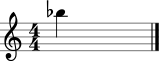

In [7]:
st1=stream.Stream()
st1.insert(0,note.Note("B-5"))
st1.show()

位置を指定して挿入する場合はinsertを使う

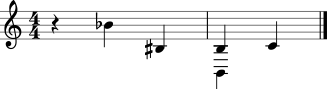

In [24]:
st1=stream.Stream()
st1.insert(1,note.Note("B-4"))
st1.insert(2,note.Note("B#3"))
st1.insert(4 , note.Note("B3"))
st1.insert(4 , note.Note("B2"))
st1.insert(5 , note.Note("C4"))
st1.show()

appendは最後に追加してくれるので位置の指定をしなくてよくて便利

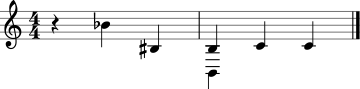

In [25]:
st1.append(note.Note("C4"))
st1.show()

C4をMajor 3rd(長三度)だけシフトした音すなわちE4を追加

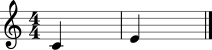

In [26]:
st1=stream.Stream()
st1.insert(0 , note.Note("C4"))
st1.insert(6 , note.Note("C4").transpose("M3"))
st1.show()

E4をdouble diminished 6th（重減６度？）だけシフトした音を追加。
ただし、double diminishedやdouble augumentedが実際に使われることはまれとのこと。
（https://en.wikipedia.org/wiki/Interval_(music)#Main_intervals
を参照。日本語版wikipediaはいまいちなので英語版を見ること）



その他の参考URL：

http://guitarchord-lab.com/theory/interval.html



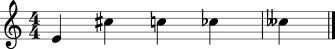

In [27]:
st1 = stream.Stream()
st1.append(note.Note("E4"))
st1.append(note.Note("E4").transpose("M6"))
st1.append(note.Note("E4").transpose("m6"))
st1.append(note.Note("E4").transpose("d6"))
st1.append(note.Note("E4").transpose("dd6"))
st1.show()

なお、例えばC4の重減六度なるものは存在しないっぽい。したがって普通にラ（長６度・Major 6th）がappendされてしまう。

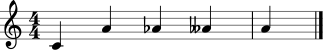

In [28]:
st1=stream.Stream()
st1.append(note.Note("C4"))
st1.append(note.Note("C4").transpose("M6"))
st1.append(note.Note("C4").transpose("m6"))
st1.append(note.Note("C4").transpose("d6"))
st1.append(note.Note("C4").transpose("dd6"))
st1.show()

そして６度には完全６度というものは存在しない

In [9]:
st1=stream.Stream()
st1.append(note.Note("C4").transpose("P6")) #returns error

ValueError: 'P' is not in list

完全５度がなぜ完全ともみなされてきたか？それはドとソの周波数比がほぼほぼ2:3になっているから。
すなわち、$2^{7/12}\approx 1.5$であるから：

In [29]:
print(2**(7/12))

1.4983070768766815


同様に完全４度はほぼほぼ３：４になっている。すなわち、
$2^{5/12}\approx\frac{4}{3}$：

In [30]:
print(2**(5/12))

1.3348398541700344


（時間的な）offsetの範囲を調べるには以下のようにすればいいだろう（？）

In [31]:
st1 = stream.Stream()
st1.append(note.Note("E4"))
st1.append(note.Note("E4").transpose("M6"))
st1.append(note.Note("E4").transpose("m6"))
st1.append(note.Note("E4").transpose("d6"))
st1.append(note.Note("E4").transpose("dd6"))
max_offset = max([x.offset for x in st1])
print(max_offset)

4.0


最後に付け加えるのをinsertでやるのであれば、以下のようにすればよいだろう

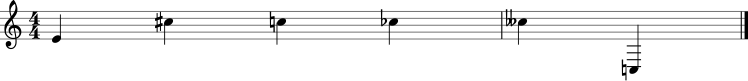

In [32]:
st1.insert(max_offset + 1 , note.Note("C3"))
st1.show()

appendは以下のようにまとめて行うことができる（ただし、和音を付け加えるような動作ではない）

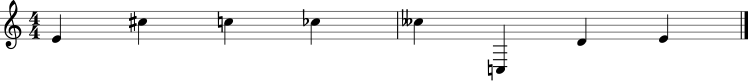

In [33]:
st1.append([note.Note("D4") , note.Note("E4")])
st1.show()

以下のように和音を追加することはできない・・

In [34]:
st1.insert(max_offset + 1 , [note.Note("D4") , note.Note("E4")]) #returns error

StreamException: to put a non Music21Object in a stream, create a music21.ElementWrapper for the item

あるoffsetの範囲を切り取るには・・・

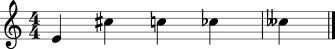

In [35]:
st1.getElementsByOffset(0,4).show()

ただし、ヒエラルヒーがある場合の切り取り方はまだ試行削除中・・

## 楽器の指定、key signature（調記号・調号）の追加など

In [15]:
st3=stream.Stream()
st3.append(note.Note("C4"))
st3.append(instrument.ElectricGuitar())
st3.append(note.Note("C4"))
st3.append(instrument.Piano())
st3.append(note.Note("C4"))
st3.append(key.KeySignature(1))
st3.append(note.Note("C4"))
st3.append(key.KeySignature(2))

上記でいいのか？
(慣習的にどうかはともかく入力として許容されるのか？)

In [18]:
st3.getInstrument()

<music21.instrument.Instrument Electric Guitar>

In [19]:
[x for x in st3.getInstruments()]

[<music21.instrument.Instrument Electric Guitar>,
 <music21.instrument.Instrument Piano>]

## score, part, measureについて

scoreとPartとMeasureがstreamの基本的なsubclass

scoreがpartを複数含み、partはmeasureを複数持つ、というのが基本的なScoreの構成（deep jazzの例のようにそうでないヒエラルヒーを持つ場合もある）。
この「基本的な構成」を持つ例としてバッハの楽譜xmlファイルを読み込む

In [3]:
s_bach = corpus.parse('bach/bwv65.2.xml')

このscoreは４つのPartから構成される。

各Partは各楽器に対応していて、それぞれひとつずつPartがある。

In [4]:
[type(x) for x in s_bach.getElementsByClass(stream.Stream)] #a lot of "Part"s

[music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part]

このBachの例ではPartはmeasure(小節)から成る。

In [5]:
[" ".join([str(type(y)) for y in x.getElementsByClass(stream.Stream)]) for x in s_bach.getElementsByClass(stream.Stream)]

["<class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'>",
 "<class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <cla

ただし、

http://web.mit.edu/music21/doc/usersGuide/usersGuide_06_stream2.html

に注意があるように、PartはtimeSignatureやkeySignatureなども格納できるので、getElementByClassでアクセスするほうが安全:

In [6]:
print(len([x for x in s_bach]))
print(len([type(x) for x in s_bach.getElementsByClass(stream.Stream)] ))

6
4


### appendの動作
noteを追加すると後ろに音を追加
streamのsubclassを追加した場合はヒエラルヒーを構成する、けれど時間的順序はnoteを追加した場合と同じ？？？

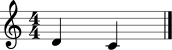

In [27]:
st0 = stream.Stream()
st0.append(note.Note("D4"))
st1 = stream.Stream()
st1.append(note.Note("C4"))
st0.append(st1)
st0.show()

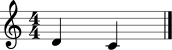

In [11]:
st0 = stream.Stream()
st0.append(note.Note("D4"))
st1 = stream.Stream()
st1.append(note.Note("C4"))
st2 = stream.Stream()
st2.append(st0)
st2.append(st1)
st2.show()

In [12]:
[type(i) for i in st2]

[music21.stream.Stream, music21.stream.Stream]

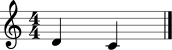

In [9]:
st0 = stream.Stream()
st0.insert(0, note.Note("D4"))
st1 = stream.Stream()
st1.insert(0,note.Note("C4"))
st2 = stream.Stream()
st2.append(st0)
st2.append(st1)
st2.show()

In [10]:
[type(i) for i in st2]

[music21.stream.Stream, music21.stream.Stream]

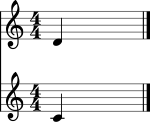

In [13]:
st0 = stream.Stream()
st0.insert(0, note.Note("D4"))
st1 = stream.Stream()
st1.insert(0,note.Note("C4"))
st2 = stream.Stream()
st2.insert(0 , st0)
st2.insert(0, st1)
st2.show()

In [14]:
[type(i) for i in st2]

[music21.stream.Stream, music21.stream.Stream]

## 上記のヒエラルヒーと異なる構造を持つ例

deepjazzの例では

Score (midi_data) > Part (melody_stream) > Voice (melody1,2 , melody_voice) ＞ Note

という階層に従ってデータを切り出しているように見える。
すなわちPartはMeasureを持たず、その代わり（？）にVoiceを持っている：

In [5]:
s_jazz = converter.parse('C:/Users/t/PycharmProjects/deepjazz_in_a_file/midi/original_metheny.mid')

In [6]:
s_jazz_parts = [x for x in s_jazz.getElementsByClass(stream.Part)]
len(s_jazz_parts)

19

partは楽器が指定してあったりなかったり。

In [14]:
[x.getInstrument() for x in s_jazz.getElementsByClass(stream.Part)]

[<music21.instrument.Instrument Piano>,
 <music21.instrument.Instrument Acoustic Bass>,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument Electric Guitar>,
 <music21.instrument.Instrument Trumpet>,
 <music21.instrument.Instrument Horn>,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument : >,
 <music21.instrument.Instrument Piano>,
 <music21.instrument.Instrument : >,
 <music21.instrument.Instrument : >,
 <music21.instrument.Instrument : >,
 <music21.instrument.Instrument : >,
 <music21.instrument.Instrument : >,
 <music21.instrument.Instrument : >,
 <music21.instrument.Instrument : >]

In [7]:
s_jazz_part0_voices = [x for x in s_jazz_parts[0].getElementsByClass(stream.Voice)]
len(s_jazz_part0_voices)

5

partの構成要素であるvoiceにも同様にinstrumentが指定してあったりしなかったり。おそらく、partレベルで指定しておき、それが構成要素であるvoiceに遺伝している形か

In [16]:
[x.getInstrument() for x in s_jazz_parts[a].getElementsByClass(stream.Voice)]

[<music21.instrument.Instrument >,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument >]

In [40]:
s_jazz_part0_voices.show()

AttributeError: 'list' object has no attribute 'show'

In [ ]:
s_jazz_part0_voices[0].show()

VoiceのなかにMeasureがあるかと思いきやそんなものはない：

In [ ]:
len(s_jazz_part0_voices[0].getElementsByClass(stream.Measure))

ではなにが入っているかといえば、（ScoreのなかのPartのなかの）各PartのVoice[0]はおおむねChordから構成されている（他はnote.Rest, note.Noteが少々）：

In [17]:
"   ".join([str(type(x)) for x in s_jazz_part0_voices[0]])

"<class 'music21.note.Rest'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.note.Note'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'mus

おそらく各パートのvoice[1]以降はおおむねnoteから構成されている（？）

であるが、deepjazzでchordパートを切り出す際にはそのように決め打つことなく、solo_stream[0]からremoveByClassでnoteを除外しつつすべてのchordを抽出している。
また、melodyパートはsolo_stream[-1]から特に除外操作をすることなくすべてのnoteを抽出できている（？）

In [18]:
"   ".join([str(type(x)) for x in s_jazz_part0_voices[1]])

"<class 'music21.note.Rest'>   <class 'music21.note.Note'>   <class 'music21.note.Rest'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.note.Note'>   <clas

ChordもNoteもGeneralNoteの派生クラス

参考URL：
http://web.mit.edu/music21/doc/moduleReference/moduleNote.html#music21.note.GeneralNote


## chord（和音）について
deep jazzの解明のためにはChord、すなわち「和音」の理解が重要そうなので少し深堀してみる

参考URL:
http://web.mit.edu/music21/doc/usersGuide/usersGuide_07_chords.html

chord（和音）の作り方：

In [9]:
cMinor = chord.Chord(["C4", "G4","E-5"])

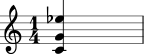

In [10]:
cMinor.show()

noteにはpitchがあるが、

In [11]:
note.Note("C4").pitch

<music21.pitch.Pitch C4>

Chord（和音）にはpitchはない：

In [12]:
cMinor.pitch # returns errof

AttributeError: 'Chord' object has no attribute 'pitch'

そのかわりpitchesがある：

In [13]:
cMinor.pitches

(<music21.pitch.Pitch C4>, <music21.pitch.Pitch G4>, <music21.pitch.Pitch E-5>)

MajorかMinorかを判別してくれるメソッドはこれ：

In [14]:
cMinor.isMajorTriad()

False

英和対応：
+ triad : 三和音
+ major triad : 長三和音
+ minor triad : 短三和音

日本語wikipedia
https://ja.wikipedia.org/wiki/%E7%9F%AD%E4%B8%89%E5%92%8C%E9%9F%B3
によれば、短三和音は
+ base
+ base + m3
+ base + P5
によって構成される三和音とのことだが・・・

In [15]:
cMinor.isMinorTriad()

True

はTrueになるのでisMinorTriadの判定基準は日本語wikipediaの定義と異なる？

というより、オクターブの違いは無視している(すわわちmod 12)ということか?

より近接した音で構成される和音に変えるには以下のようにする：

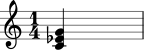

In [16]:
cMinor.closedPosition().show()

コードの「名前」を知りたければ以下のようにする：

In [17]:
print(cMinor.commonName)

minor triad


メソッドisMajorTriadが何をやっているかは以下で解明できるはず：（だがスキップして先に進もう）

In [18]:
cMinor.isMajorTriad??

ドミソをミソドにしたようなのを展開形という。展開形かどうかのチェックは以下のようにする：

In [19]:
cMinor.inversion()

0

## scale(音階)について

In [21]:
scaleType = scale.MajorScale()

http://web.mit.edu/music21/doc/moduleReference/moduleScale.html

によれば

ConcreteScale.derive(other, comparisonAttribute='pitchClass')

Return the closest-matching ConcreteScale based on the pitch collection provided as a Stream, a ConcreteScale, or a list of Pitch objects.

要は音階がドミソ（すべて白鍵）ならドレミファソラシド（すべて白鍵）が含まれているC Major音階と推定するような感じか。
推定アルゴリズムは変化の可能性ありと公式ウェブにも書いてある

In [24]:
scaleType.derive(cMinor)

<music21.scale.MajorScale B- major>

In [29]:
scales = scale.MinorScale().derive(cMinor)
scales

<music21.scale.MinorScale G minor>

推定されたscaleに含まれる音を確認

In [30]:
set([pitch for pitch in scales.getPitches()])

{<music21.pitch.Pitch G4>,
 <music21.pitch.Pitch A4>,
 <music21.pitch.Pitch B-4>,
 <music21.pitch.Pitch C5>,
 <music21.pitch.Pitch D5>,
 <music21.pitch.Pitch E-5>,
 <music21.pitch.Pitch F5>,
 <music21.pitch.Pitch G5>}

## abstract grammar
abstract grammarは
http://ai.stanford.edu/~kdtang/papers/smc09-jazzgrammar.pdf
に記述がある。以下解読を試みる

### abstract_grammar論文のSymbol S
deep jazzの__is_scale_toneでは和音が属している（deriveで推定）音階に入っている音かどうかを判定している

### Symbol C
和音自体の構成音とのマッチング判定をしている

### Symbol A
和音の構成音±１かどうかを判定

（Δ 1 2 S8 S8 S8)は
- 上記の分類でSとなる八分音符が音が高くなる形で３つ続く
- 各音の間のpitchは最低で１半音、最大で２半音

であることを意味している

このabstract grammarのポイント
- 「上がり始めるとしばらく上がっている傾向が強い」というmomentum的な傾向があること
- 上昇・下降スピードが一定範囲以内であればある種の同一視が可能なこと


- 上昇・下降が連続しない場合、本来であれば速度の「上限＝下限」となるが、半音ずつ緩めたほうが良いとのこと

### 参考情報

Cruz-Alcazar and Vidal-RuizはGregorian, Bach, JoplinでGrammatical Inferenceに基づき、音楽を生成。Gregorianのパフォーマンスが最もよかった。


Pedro P. Alcazar and Enrique Vidal-Ruiz, “Learning
Regular Grammars to Model Musical Style: Comparing
Different Coding Schemes”, Proceedings of 4th ICGI, 211-
222, 1998.

## Markov chain

推移行列を推定するために似た「abstract measures」をK-meansでクラスタリングする。この際以下の7次元のユークリッド空間に各abstract measureをマップして行う

(note数, window内の最初の音の位置 , restのtotal duration , 上昇スロープおよび下降スロープの勾配絶対値の平均 , on the beatからスタートするか , 上昇・下降の切り替わりの回数　, consonance)

ただし、consonaneは以下のスコアの合計
- chord note : 0.8
- approach note : 0.6
- color note : 0.4
- その他 : 0.1


## Deep jazz code上のabstract grammarの表現・表記

- 論文でR8と表記されているもの->R,0.125に
- slopeの上限、下限は論文では半音数表記だが、deep jazzコード上はM3()といった表記

## フラット化

フラット化してもクラスは変わらない。すなわち、
+ stream.Streamをフラットにするとフラットなstream.Streamが
+ stream.Scoreをフラットにするとフラットなstream.Scoreが

できることになる。

そして、それぞれダイレクトにnoteが収納されている。

In [52]:
st1.flat

<music21.stream.Stream 0x87929e8_flat>

In [51]:
" ".join([str(type(x)) for x  in s_bach.flat.getElementsByClass(note.Note)])#example of how to flatten the score

"<class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.note.Note'> <class 'music21.not

In [ ]:
" ".join([str(type(x)) for x  in s_jazz.flat.getElementsByClass(note.Note)])#example of how to flatten the score

In [44]:
print(type(s_bach.flat))#score
print(type(s_jazz.flat))#score

<class 'music21.stream.Score'>
<class 'music21.stream.Score'>


## 微分音（microtonal)

参考URL:

https://en.wikipedia.org/wiki/Microtonal_music

https://groups.google.com/forum/#!topic/music21list/-8PTr2gU8Hs

http://web.mit.edu/music21/doc/moduleReference/modulePitch.html#music21.pitch.Pitch.convertMicrotonesToQuarterTones


## その他の基本的なscoreに対する操作(あまり必要ないかも)

In [ ]:
s.analyze('key')

s.show('midi')

s.show()

## tinynotationについて

In [ ]:
p = converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")

In [ ]:
s2 = stream.Stream()
s2.insert(0  , p)#adding part, first argument should be offset??

In [ ]:
s2.show()

In [ ]:
q=converter.parse("tinynotation: c4 d8 f g16 a g f#")
s2.insert(100,q)

In [ ]:
s2.show()

In [ ]:
r=converter.parse("tinynotation: c4 d8 f g16 a g f#")
s2.insert(10,r)
s2.show()

In [57]:
s2.insert?

In [58]:
?s2.insert